# Линейные модели, SVM и деревья решений.

Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.

In [13]:
# импортируем нужные для анализа библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных

Используем датасет по характеристикам бриллиантов [Diamonds](https://www.kaggle.com/datasets/shivam2503/diamonds).

In [14]:
# Импортируем датасет
data = pd.read_csv('data/diamonds.csv', sep=",")
data = data.set_index("Unnamed: 0")
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
# типы колонок
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Заменяем категориальные столбцы на числовые (оптимально, так как cut, color и clarity, по сути, тоже шкалы, только не числовые):

In [16]:
data['cut_num'] = data['cut'].apply(lambda x: ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'].index(x))
data['color_num'] = data['color'].apply(lambda x: ['D', 'E', 'F', 'G', 'H', 'I', 'J'].index(x))
data['clarity_num'] = data['clarity'].apply(lambda x: ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'].index(x))
data.pop('cut')
data.pop('color')
data.pop('clarity')
data.head()

,carat,depth,table,price,x,y,z,cut_num,color_num,clarity_num
Unnamed: 0,,,,,,,,,,
1,0.23,61.5,55.0,326,3.95,3.98,2.43,4,1,7
2,0.21,59.8,61.0,326,3.89,3.84,2.31,3,1,6
3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,1,4
4,0.29,62.4,58.0,334,4.20,4.23,2.63,3,5,5
5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,6,7


In [17]:
# Выделяем классифицирующий параметр, делим выборку на обучающую и тестовую
data_target = data.pop("price")
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data, data_target, test_size=0.3, random_state=1)

In [18]:
# размер набора данных
data_x_train.shape, data_y_train.shape, data_x_test.shape, data_y_test.shape

((37758, 9), (37758,), (16182, 9), (16182,))

In [19]:
type(data_x_train), type(data_y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

# Обучение модели линейной регрессии

Для начала реализуем вариант модели линейной регрессии. Мы предполагаем, что регрессионный признак (цена бриллианта) линейно зависит от матрицы остальных.
Чтобы избежать переобучения, будем использовать метод ElasticNet.

In [20]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [21]:
l1_ratios = [0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 0.95]

for l1_ratio in l1_ratios:
    lin_model = ElasticNet(l1_ratio=l1_ratio).fit(data_x_train, data_y_train)
    score = lin_model.score(data_x_test, data_y_test)
    lin_pred_y = lin_model.predict(data_x_test)
    mse = mean_squared_error(data_y_test, lin_pred_y)   
    print("L1_Ratio: {0:.2f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(l1_ratio, score, mse, np.sqrt(mse)))


L1_Ratio: 0.05, R2:0.78, MSE:3447976.10, RMSE:1856.87
L1_Ratio: 0.10, R2:0.78, MSE:3375513.46, RMSE:1837.26
L1_Ratio: 0.20, R2:0.79, MSE:3230714.31, RMSE:1797.42
L1_Ratio: 0.30, R2:0.80, MSE:3086942.97, RMSE:1756.97
L1_Ratio: 0.50, R2:0.82, MSE:2807141.04, RMSE:1675.45
L1_Ratio: 0.70, R2:0.83, MSE:2546054.19, RMSE:1595.64
L1_Ratio: 0.90, R2:0.85, MSE:2267462.55, RMSE:1505.81
L1_Ratio: 0.95, R2:0.86, MSE:2115221.00, RMSE:1454.38


Видно, что чем больше L1_ratio (т.е. чем ближе регуляризация к LASSO), тем лучше модель - увеличивается R2 (т.е. уменьшается необъяснённая дисперсия) и уменьшается средняя ошибка.

# Обучение SVM-модели

Основная идея метода (из Википедии) — перевод исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с максимальным зазором в этом пространстве. Две параллельных гиперплоскости строятся по обеим сторонам гиперплоскости, разделяющей классы. Разделяющей гиперплоскостью будет гиперплоскость, максимизирующая расстояние до двух параллельных гиперплоскостей. Алгоритм работает в предположении, что чем больше разница или расстояние между этими параллельными гиперплоскостями, тем меньше будет средняя ошибка классификатора.

Для построения соответствующей гиперплоскости будем использовать так называемый Kernel Trick - подмену параметров на функции от них, благодаря чему построенные гиперплоскости, линейно разделяющие функции от параметров, будут нелинейно разделять сами параметры.

In [22]:
from sklearn.svm import NuSVR

In [23]:
nus = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
for nu in nus:
    svr_model = NuSVR(kernel='linear', nu=nu).fit(data_x_train, data_y_train)
    score = svr_model.score(data_x_test, data_y_test)
    svr_pred_y = svr_model.predict(data_x_test)
    mse = mean_squared_error(data_y_test, svr_pred_y)   
    print("Linear: Nu: {0:.2f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(nu, score, mse, np.sqrt(mse)))

print()

for nu in nus:
    svr_model = NuSVR(kernel='sigmoid', nu=nu).fit(data_x_train, data_y_train)
    score = svr_model.score(data_x_test, data_y_test)
    svr_pred_y = svr_model.predict(data_x_test)
    mse = mean_squared_error(data_y_test, svr_pred_y)   
    print("Sigmoid: Nu: {0:.2f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(nu, score, mse, np.sqrt(mse)))


Linear: Nu: 0.01, R2:-1.00, MSE:30703331.17, RMSE:5541.06
Linear: Nu: 0.10, R2:0.83, MSE:2597532.90, RMSE:1611.69
Linear: Nu: 0.20, R2:0.85, MSE:2354888.03, RMSE:1534.56
Linear: Nu: 0.30, R2:0.85, MSE:2339583.30, RMSE:1529.57
Linear: Nu: 0.40, R2:0.84, MSE:2401404.84, RMSE:1549.65
Linear: Nu: 0.50, R2:0.84, MSE:2492292.54, RMSE:1578.70

Sigmoid: Nu: 0.01, R2:-1.88, MSE:44109397.97, RMSE:6641.49
Sigmoid: Nu: 0.10, R2:-0.58, MSE:24179185.90, RMSE:4917.23
Sigmoid: Nu: 0.20, R2:-0.12, MSE:17253718.81, RMSE:4153.76
Sigmoid: Nu: 0.30, R2:-0.01, MSE:15435374.46, RMSE:3928.79
Sigmoid: Nu: 0.40, R2:-0.01, MSE:15419788.44, RMSE:3926.80
Sigmoid: Nu: 0.50, R2:-0.03, MSE:15874113.88, RMSE:3984.23


Как видно, зависимость цены бриллианта от его остальных характеристик скорее линейная, поэтому линейный SVR сработал лучше (пусть и немного хуже, чем линейная регрессия)

Попробуем добавить масштабирование входных данных

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data)

In [31]:
data[:2]

,carat,depth,table,x,y,z,cut_num,color_num,clarity_num
Unnamed: 0,,,,,,,,,
1,0.23,61.5,55.0,3.95,3.98,2.43,4,1,7
2,0.21,59.8,61.0,3.89,3.84,2.31,3,1,6


In [32]:
sc1_data[:2]

array([[0.00623701, 0.51388889, 0.23076923, 0.36778399, 0.06757216,
        0.07641509, 1.        , 0.16666667, 0.85714286],
       [0.002079  , 0.46666667, 0.34615385, 0.36219739, 0.06519525,
        0.07264151, 0.75      , 0.16666667, 0.71428571]])

In [27]:
data_x_train2, data_x_test2, data_y_train2, data_y_test2 = train_test_split(sc1_data, data_target, test_size=0.3, random_state=1)
data_x_train2.shape, data_y_train2.shape, data_x_test2.shape, data_y_test2.shape

((37758, 9), (37758,), (16182, 9), (16182,))

In [29]:
nus = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
for nu in nus:
    svr_model2 = NuSVR(kernel='linear', nu=nu).fit(data_x_train2, data_y_train2)
    score = svr_model2.score(data_x_test2, data_y_test2)
    svr_pred_y2 = svr_model2.predict(data_x_test2)
    mse = mean_squared_error(data_y_test2, svr_pred_y2)   
    print("Linear with scaling: Nu: {0:.2f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(nu, score, mse, np.sqrt(mse)))

Linear with scaling: Nu: 0.01, R2:-1.87, MSE:43965133.36, RMSE:6630.62
Linear with scaling: Nu: 0.10, R2:-0.50, MSE:22994340.19, RMSE:4795.24
Linear with scaling: Nu: 0.20, R2:-0.01, MSE:15550399.77, RMSE:3943.40
Linear with scaling: Nu: 0.30, R2:0.14, MSE:13218618.75, RMSE:3635.74
Linear with scaling: Nu: 0.40, R2:0.17, MSE:12677548.89, RMSE:3560.55
Linear with scaling: Nu: 0.50, R2:0.18, MSE:12612528.23, RMSE:3551.41


Как видно из метрик, модель потеряла в качестве, возможно, например, из-за потери взаимосвязи между значениями размеров бриллианта - x, y, z и depth

# Решающее дерево

In [36]:
from io import StringIO 
import graphviz 
import pydotplus
from sklearn.tree import export_graphviz


In [37]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

# Основной алгоритм построения дерева решения
Фактически, алгоритм построения обучающего дерева, детально описанный здесь, сводится к нескольким пунктам:

Для текущего выбранного признака (колонки) из N признаков построить все варианты ветвления (разбиения) по значениям (для категориальных признаков) или по диапазонам значений (для числовых признаков). При этом будет сформировано K поддеревьев (где K - число ветвлений). Каждое поддерево содержит подвыборку, которая включает только строки выборки, соответствующие результатам ветвления. В каждом поддереве расположена:

или выборка, содержащая N-1 признак, если признак, для которого строится ветвление, полностью пропадает в результате ветвления;
или выборка, содержащая N признаков, если признак, для которого строится ветвление, не пропадает полностью в результате ветвления, но при этом число строк в выборке уменьшается;
Если подвыборке соответствует единственное значение целевого признака, то в дерево добавляется терминальный лист, который соответствует предсказанному значению.

Если в подвыборке больше одного значения целевого признака, то предыдущие пункты выполняются рекурсивно для подвыборки.

In [44]:
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image

In [55]:
# Обучим дерево на всех признаках датасета c ограничением глубины дерева
tree_regr_prun = DecisionTreeRegressor(random_state=1, max_depth=3)
tree_regr_prun.fit(data_x_train, data_y_train)
tree_regr_prun

DecisionTreeRegressor(max_depth=3, random_state=1)

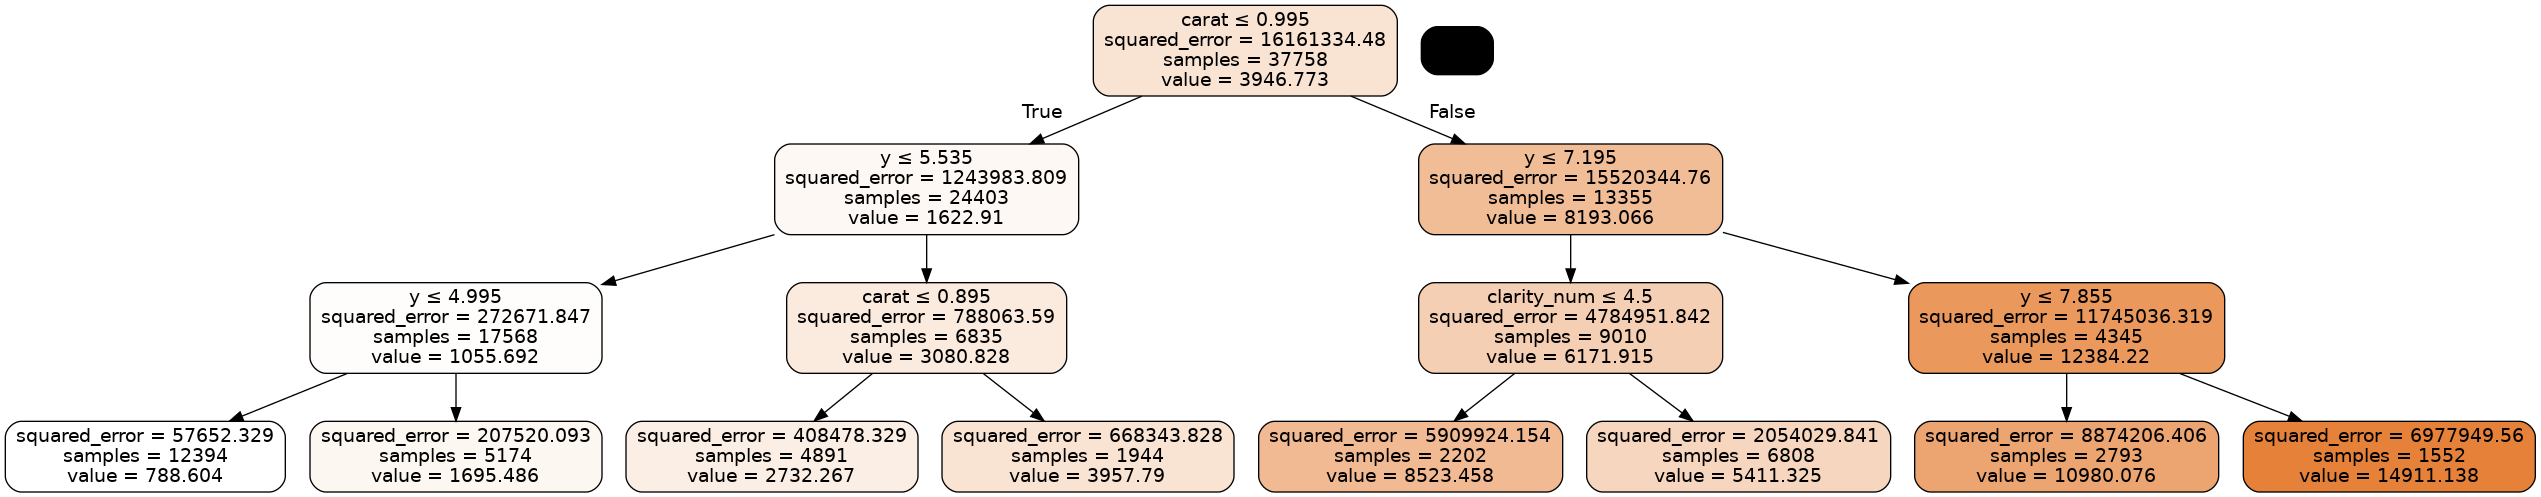

In [56]:
Image(get_png_tree(tree_regr_prun, data_x_train.columns), height='70%')

In [57]:
# Обучим дерево на всех признаках датасета
tree_regr = DecisionTreeRegressor(random_state=1)
tree_regr.fit(data_x_train, data_y_train)
tree_regr

DecisionTreeRegressor(random_state=1)

In [62]:
mean_squared_error(data_y_test, tree_regr.predict(data_x_test))

561753.9233561982

In [58]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

In [60]:
sum(tree_regr.feature_importances_)

1.0

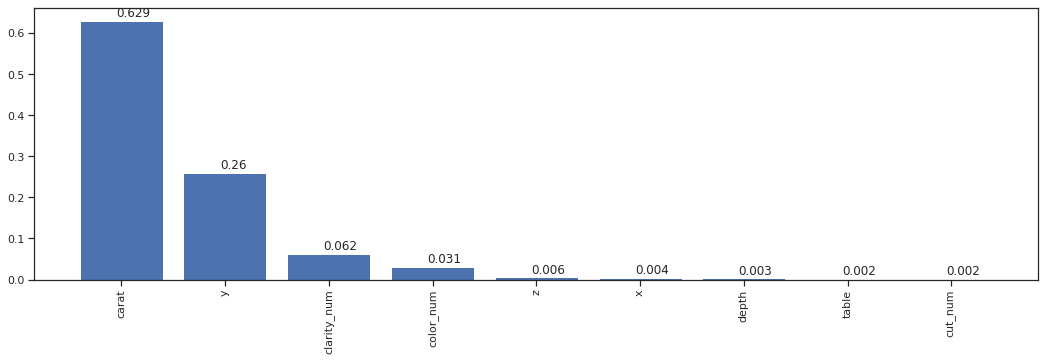

In [59]:
tree_regr_fl, tree_regr_fd = draw_feature_importances(tree_regr, data_x_train)

In [63]:
# Пересортируем признаки на основе важности
data_sorted = data[tree_regr_fl]
data_sorted.head()

,carat,y,clarity_num,color_num,z,x,depth,table,cut_num
Unnamed: 0,,,,,,,,,
1,0.23,3.98,7,1,2.43,3.95,61.5,55.0,4
2,0.21,3.84,6,1,2.31,3.89,59.8,61.0,3
3,0.23,4.07,4,1,2.31,4.05,56.9,65.0,1
4,0.29,4.23,5,5,2.63,4.20,62.4,58.0,3
5,0.31,4.35,7,6,2.75,4.34,63.3,58.0,1


Посмотрим, зависит ли эффективность обучения решающего дерева от порядка признаков в датасете

In [64]:
# Разделение данных на обучающую и тестовую выборки
data_x_train_sorted, data_x_test_sorted, data_y_train_sorted, data_y_test_sorted = train_test_split(
    data_sorted, data_target, test_size=0.3, random_state=1)

In [104]:
# Обучим дерево и предскажем результаты на различном количестве признаков
for i in range(1, len(tree_regr_fl) + 1):
    tree_regr_feat_i = DecisionTreeRegressor(random_state=1).fit(data_x_train_sorted[tree_regr_fl[0:i]], data_y_train_sorted)
    score = tree_regr_feat_i.score(data_x_test_sorted[tree_regr_fl[0:i]], data_y_test_sorted)
    tree_regr_feat_i_pred = tree_regr_feat_i.predict(data_x_test_sorted[tree_regr_fl[0:i]])
    mse = mean_squared_error(data_y_test_sorted, tree_regr_feat_i_pred)   
    print("tree with {0} features: R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(i, score, mse, np.sqrt(mse)))

tree with 1 features: R2:0.87, MSE:1988657.14, RMSE:1410.20
tree with 2 features: R2:0.83, MSE:2541264.51, RMSE:1594.13
tree with 3 features: R2:0.90, MSE:1608697.08, RMSE:1268.34
tree with 4 features: R2:0.96, MSE:548972.76, RMSE:740.93
tree with 5 features: R2:0.96, MSE:567733.27, RMSE:753.48
tree with 6 features: R2:0.96, MSE:556408.78, RMSE:745.93
tree with 7 features: R2:0.96, MSE:549754.51, RMSE:741.45
tree with 8 features: R2:0.96, MSE:559300.15, RMSE:747.86
tree with 9 features: R2:0.96, MSE:561754.35, RMSE:749.50


Как видно, дерево с 4 главными признаками показало себя лучше, чем как другие деревья, так и линейная регрессия и SVR

Попробуем подобрать такие гиперпараметры, при которых получится максимально эффективное дерево

In [74]:
from sklearn.model_selection import GridSearchCV

In [91]:
params = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None],
    'min_samples_leaf': [0.04, 0.06, 0.08, 1],
    'max_features': [0.2, 0.4, 0.6, 0.8, 0.9, None]
}

In [102]:
%%time
grid_1 = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
                    param_grid=params, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)
grid_1.fit(data, data_target)

CPU times: user 11.2 s, sys: 5.16 s, total: 16.4 s
Wall time: 25.5 s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None],
                         'max_features': [0.2, 0.4, 0.6, 0.8, 0.9, None],
                         'min_samples_leaf': [0.04, 0.06, 0.08, 1]},
             scoring='neg_mean_absolute_error')

In [100]:
%%time
grid_2 = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
                    param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_2.fit(data, data_target)

CPU times: user 11.1 s, sys: 6.08 s, total: 17.2 s
Wall time: 26.7 s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None],
                         'max_features': [0.2, 0.4, 0.6, 0.8, 0.9, None],
                         'min_samples_leaf': [0.04, 0.06, 0.08, 1]},
             scoring='neg_mean_squared_error')

In [103]:
-grid_1.best_score_, grid_1.best_params_

(751.1030795859049,
 {'max_depth': 11, 'max_features': 0.9, 'min_samples_leaf': 1})

In [101]:
-grid_2.best_score_, grid_2.best_params_

(1615124.0918298685,
 {'max_depth': 11, 'max_features': 0.9, 'min_samples_leaf': 1})